In [1]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from matplotlib import colors
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm
from astropy import units as u
from speclite import filters

repo_dir = '/grad/bwedig/mejiro'
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

from mejiro.instruments.hwo import HWO
from mejiro.synthetic_image import SyntheticImage
from mejiro.galaxy_galaxy import GalaxyGalaxy, SampleGG, SampleBELLS, SampleSL2S
from mejiro.exposure import Exposure
from mejiro.utils import util

%matplotlib inline

# set HWO directory
hwo_dir = os.path.join(repo_dir, 'hwo')

Warning, 5 of 20000 bins contained negative fluxes; they have been set to zero.


/data/bwedig/.conda/envs/mejiro-v2/lib/python3.10/site-packages/pysynphot/units.py:824: RuntimeWarning: divide by zero encountered in log
  return -1.085736 * N.log(arg) + ABZERO


Warning, 3590 of 20000 bins contained negative fluxes; they have been set to zero.
Warning, 293 of 2920 bins contained negative fluxes; they have been set to zero.


Scene size: 5.001921551492087 arcsec, 291 pixels at pixel scale 0.017188733853924696 arcsec/pix


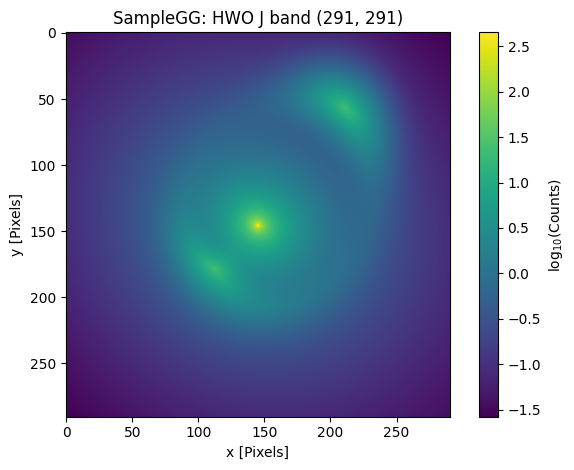

In [2]:
strong_lens = SampleGG()
hwo = HWO()
band = 'J'

synthetic_image = SyntheticImage(strong_lens, hwo, band)
synthetic_image.plot()

In [3]:
import lenstronomy.Util.data_util as data_util

cps = data_util.magnitude2cps(22.5, magnitude_zero_point=hwo.get_zeropoint_magnitude(band))
print(cps)

print(hwo.get_pixel_scale(band) ** 2)

print((hwo.get_pixel_scale(band) ** 2).value * cps)

448.67160650341197
0.00029545257150105696 arcsec2 / pix2
0.1325611799009434


In [7]:
pprint(hwo.sky_level)

{'B': <Quantity 0.0111731 ct / pix>,
 'FUV': <Quantity 0.00220889 ct / pix>,
 'H': <Quantity 0.12894852 ct / pix>,
 'I': <Quantity 0.02109472 ct / pix>,
 'J': <Quantity 0.1564647 ct / pix>,
 'K': <Quantity 0.09341494 ct / pix>,
 'NUV': <Quantity 0.00045727 ct / pix>,
 'R': <Quantity 0.01941663 ct / pix>,
 'U': <Quantity 0.00654898 ct / pix>,
 'V': <Quantity 0.01600198 ct / pix>}


Exposure calculation time with galsim engine: 0:00:00


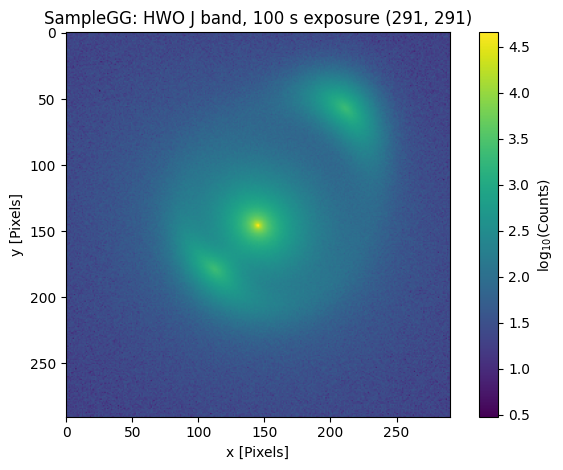

In [6]:
exposure = Exposure(synthetic_image, 100)
exposure.plot()